### This code calculate RSI indicator
#### The used data is daily and for Amazon stock

In [1]:
import pandas as pd

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=S5MWNN99HI7DEL1T&datatype=csv'
df = pd.read_csv(url)

print(df)

       timestamp      open      high        low    close  adjusted_close  \
0     2021-11-02  3315.010  3331.115  3283.5500  3312.75         3312.75   
1     2021-11-01  3361.800  3375.860  3292.0200  3318.11         3318.11   
2     2021-10-29  3300.020  3374.820  3273.3200  3372.43         3372.43   
3     2021-10-28  3402.095  3479.000  3386.0000  3446.57         3446.57   
4     2021-10-27  3388.000  3437.000  3371.4534  3392.49         3392.49   
...          ...       ...       ...        ...      ...             ...   
5533  1999-11-05    64.750    65.500    62.2500    64.94           64.94   
5534  1999-11-04    67.190    67.190    61.0000    63.06           63.06   
5535  1999-11-03    68.190    68.500    65.0000    65.81           65.81   
5536  1999-11-02    69.750    70.000    65.0600    66.44           66.44   
5537  1999-11-01    68.060    71.880    66.3100    69.13           69.13   

        volume  dividend_amount  split_coefficient  
0      2562277              0.0   

In [2]:
df=(df.iloc[::-1]).reset_index(drop=True)
df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,1999-11-01,68.060,71.880,66.3100,69.13,69.13,12824100,0.0,1.0
1,1999-11-02,69.750,70.000,65.0600,66.44,66.44,13243200,0.0,1.0
2,1999-11-03,68.190,68.500,65.0000,65.81,65.81,10772100,0.0,1.0
3,1999-11-04,67.190,67.190,61.0000,63.06,63.06,16759200,0.0,1.0
4,1999-11-05,64.750,65.500,62.2500,64.94,64.94,11091400,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5533,2021-10-27,3388.000,3437.000,3371.4534,3392.49,3392.49,2702224,0.0,1.0
5534,2021-10-28,3402.095,3479.000,3386.0000,3446.57,3446.57,5708733,0.0,1.0
5535,2021-10-29,3300.020,3374.820,3273.3200,3372.43,3372.43,6486077,0.0,1.0
5536,2021-11-01,3361.800,3375.860,3292.0200,3318.11,3318.11,3582044,0.0,1.0


In [3]:
#print('Enter Number of Timeframe for RSI calculation:')
#n = input()

In [4]:
n=14

In [5]:
def RSI_cal(nod,data):
    upavg=[]
    dnavg=[]
    RSI=[]
    for i in range(nod):
        A=data['close'][i]
        upavg.append(data['close'][i])
        dnavg.append(data['close'][i])
        RSI.append((upavg[i])*100/(upavg[i]+dnavg[i]))
    
    for i in range(nod,len(data.index)):
            
        if(data['close'][i]> data['close'][i-1]):
            up = data['close'][i]-data['close'][i-1]
            dn=0
        else:
            up=0
            dn=data['close'][i-1]-data['close'][i]
                
        upavg.append((upavg[i-1]*(nod-1)+up)/nod)
        dnavg.append((dnavg[i-1]*(nod-1)+dn)/nod)
        RSI.append((upavg[i])*100/(upavg[i]+dnavg[i]))
    return RSI

In [6]:
RSI=RSI_cal(14,df)

In [7]:
df['RSI']=RSI

In [8]:
df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,RSI
0,1999-11-01,68.060,71.880,66.3100,69.13,69.13,12824100,0.0,1.0,50.000000
1,1999-11-02,69.750,70.000,65.0600,66.44,66.44,13243200,0.0,1.0,50.000000
2,1999-11-03,68.190,68.500,65.0000,65.81,65.81,10772100,0.0,1.0,50.000000
3,1999-11-04,67.190,67.190,61.0000,63.06,63.06,16759200,0.0,1.0,50.000000
4,1999-11-05,64.750,65.500,62.2500,64.94,64.94,11091400,0.0,1.0,50.000000
...,...,...,...,...,...,...,...,...,...,...
5533,2021-10-27,3388.000,3437.000,3371.4534,3392.49,3392.49,2702224,0.0,1.0,53.669528
5534,2021-10-28,3402.095,3479.000,3386.0000,3446.57,3446.57,5708733,0.0,1.0,58.519487
5535,2021-10-29,3300.020,3374.820,3273.3200,3372.43,3372.43,6486077,0.0,1.0,50.685924
5536,2021-11-01,3361.800,3375.860,3292.0200,3318.11,3318.11,3582044,0.0,1.0,45.843846


In [9]:
'''

from matplotlib.pyplot import figure
figure(figsize=(15, 5))

df['RSI'].plot(kind="line",linewidth=0.5, color='red')
plt.show()
'''

'\n\nfrom matplotlib.pyplot import figure\nfigure(figsize=(15, 5))\n\ndf[\'RSI\'].plot(kind="line",linewidth=0.5, color=\'red\')\nplt.show()\n'

<AxesSubplot:ylabel='RSI'>

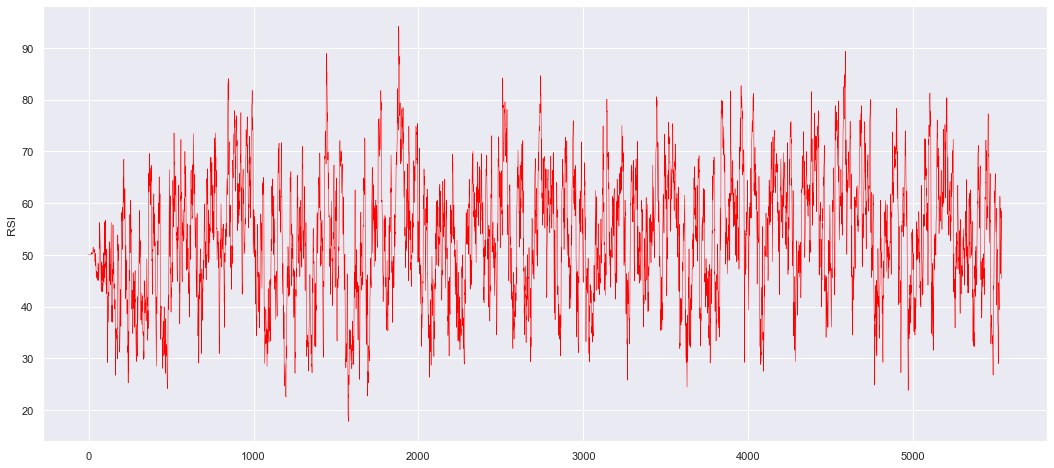

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.set(rc = {'figure.figsize':(18,8)})
sns.lineplot(data=df['RSI'], color='red',linewidth=0.5)

In [11]:

prof_per=[]
nod=14
for k in range(1,31):
    profit=0
    loss=0
    profit_q=0
    for i in range(nod,len(df.index)-30):
        if ((df['RSI'][i-1]< 30) and (df['RSI'][i]> 30)):
   
            
                if (df['close'][i+k]> df['close'][i]):
                    profit+=1
                    profit_q=profit_q+((df['close'][i+k]-df['close'][i])*100/df['close'][i])
                else:
                    loss+=1
        
    
    prof_per.append((k,profit*100/(profit+loss),profit_q/profit))
           
    

In [12]:
prof_per


[(1, 55.319148936170215, 3.3967813860498968),
 (2, 63.829787234042556, 5.1800584573089195),
 (3, 63.829787234042556, 5.556823078058474),
 (4, 63.829787234042556, 5.925604721666869),
 (5, 68.08510638297872, 6.508362144091859),
 (6, 68.08510638297872, 8.22309750407982),
 (7, 70.2127659574468, 8.018223673595305),
 (8, 68.08510638297872, 8.550076477327737),
 (9, 63.829787234042556, 10.263456652222787),
 (10, 57.4468085106383, 11.202565893367835),
 (11, 59.57446808510638, 10.578874739963439),
 (12, 53.191489361702125, 12.638210692606979),
 (13, 48.93617021276596, 13.6720437200556),
 (14, 48.93617021276596, 15.013261929138867),
 (15, 44.680851063829785, 14.385645601988276),
 (16, 48.93617021276596, 13.628630185480803),
 (17, 53.191489361702125, 12.523827165610262),
 (18, 57.4468085106383, 10.297943263814409),
 (19, 51.06382978723404, 10.79752164783018),
 (20, 51.06382978723404, 11.92437615131927),
 (21, 46.808510638297875, 11.614718238822341),
 (22, 42.5531914893617, 12.499447104314024),
 (2

In [13]:
Day=[x[0] for x in prof_per]
Increase_percent=[x[1] for x in prof_per]
Mean_profit=[x[2] for x in prof_per]

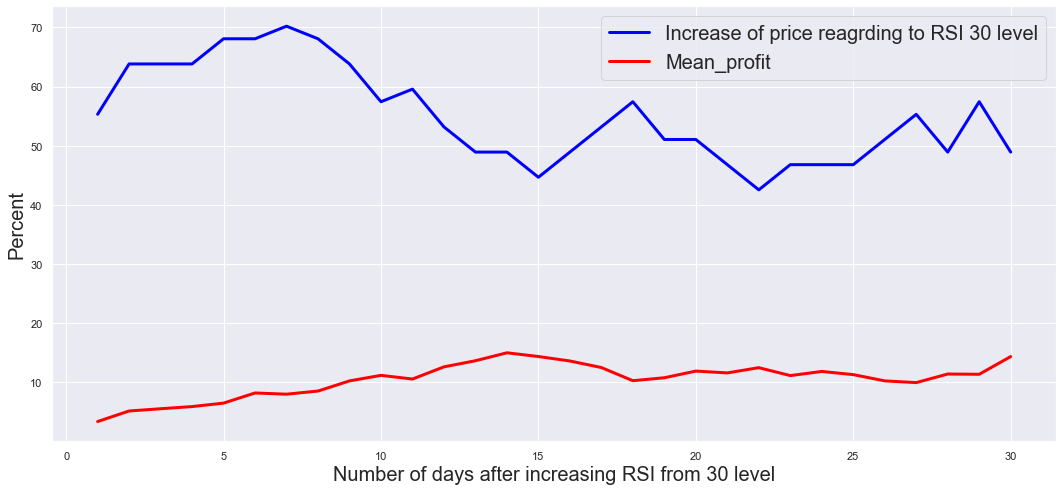

In [16]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(Day,Increase_percent,label='Increase of price reagrding to RSI 30 level',linewidth=3, color='blue')
plt.plot(Day,Mean_profit,label='Mean_profit',linewidth=3 , color='red')
plt.xlabel('Number of days after increasing RSI from 30 level',fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.legend(loc=1, prop={'size': 20})
